Dokonczyc RNN
UNET testowac na innych zbiorach
Transformer
Podstawowe eksperymenty z RSA
Runtime - jak rozwiazac to zagadnienie???
Zestawienie porównania wyników modeli
Latex - zacząć pisać od końca
1. Przeglad aktualnych rozwiazan
2. Implementacja
3. Rezultaty

# RNN for R-peak detection using the pytorch library

In [1]:
import os
import random
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import neurokit2 as nk
import torch
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from customLib.vis import *
from customLib.preprocess import *
from customLib.peak_detection import *
from customLib.load_physionet_ecgs import load_physionet_ecgs
from customLib.dataset import read_dataset, split_dataset
from customLib.config import apnea_ecg_path

In [2]:
DATASET_PATH = os.path.join(apnea_ecg_path, "dataset")

LSTM_HIDDEN_SIZE = 32
EPOCHS = 10
BATCH_SIZE = 25
LR = 1e-4

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Training will be performed with:',device)

Training will be performed with: cuda:0


In [32]:
x, y = load_physionet_ecgs(path=apnea_ecg_path, annotation_file_extension="qrs" , force_new=True, window_in_seconds=10, expand=False)
x_train, y_train, x_test, y_test, x_val, y_val = split_dataset(path=DATASET_PATH, x=x, y=y, shuffle=False, split_ratio=0.8, is_validation_set=True)

ECGs sampling rate:  100


  1%|▏         | 1/77 [00:00<00:33,  2.27it/s]

Samples were not loaded correctly File:  a01er


  4%|▍         | 3/77 [00:01<00:24,  3.01it/s]

Samples were not loaded correctly File:  a02er


  6%|▋         | 5/77 [00:01<00:21,  3.38it/s]

Samples were not loaded correctly File:  a03er


  9%|▉         | 7/77 [00:02<00:19,  3.64it/s]

Samples were not loaded correctly File:  a04er


 27%|██▋       | 21/77 [00:09<00:30,  1.84it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide


 32%|███▏      | 25/77 [00:11<00:30,  1.68it/s]

Samples were not loaded correctly File:  b01er


 35%|███▌      | 27/77 [00:12<00:23,  2.09it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in

 36%|███▋      | 28/77 [00:12<00:24,  1.98it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in

 39%|███▉      | 30/77 [00:13<00:24,  1.90it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide


 40%|████      | 31/77 [00:14<00:25,  1.81it/s]

Samples were not loaded correctly File:  c01er
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide


 43%|████▎     | 33/77 [00:15<00:20,  2.17it/s]

Samples were not loaded correctly File:  c02er


 45%|████▌     | 35/77 [00:15<00:17,  2.44it/s]

Samples were not loaded correctly File:  c03er
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value enc

 51%|█████     | 39/77 [00:17<00:18,  2.07it/s]

invalid value encountered in divide


 52%|█████▏    | 40/77 [00:18<00:19,  1.87it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide


 53%|█████▎    | 41/77 [00:19<00:20,  1.75it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in

 58%|█████▊    | 45/77 [00:22<00:22,  1.43it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide


 61%|██████    | 47/77 [00:23<00:22,  1.34it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide


 69%|██████▉   | 53/77 [00:28<00:19,  1.24it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide


 71%|███████▏  | 55/77 [00:30<00:18,  1.19it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in

 75%|███████▌  | 58/77 [00:32<00:16,  1.16it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide


 77%|███████▋  | 59/77 [00:33<00:14,  1.20it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in

 79%|███████▉  | 61/77 [00:35<00:13,  1.19it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in

 82%|████████▏ | 63/77 [00:37<00:12,  1.11it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide


 84%|████████▍ | 65/77 [00:38<00:10,  1.09it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in

 91%|█████████ | 70/77 [00:43<00:06,  1.04it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide


 92%|█████████▏| 71/77 [00:44<00:05,  1.05it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in

 95%|█████████▍| 73/77 [00:46<00:03,  1.01it/s]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide


 99%|█████████▊| 76/77 [00:49<00:01,  1.03s/it]

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide


100%|██████████| 77/77 [00:50<00:00,  1.51it/s]


Total ECGs: 203101


In [33]:
x_train = np.expand_dims(x_train, 2)[:10000]
y_train = np.expand_dims(y_train, 2)[:10000]

x_test = np.expand_dims(x_test, 2)[:3000]
y_test = np.expand_dims(y_test, 2)[:3000]

x_val = np.expand_dims(x_val, 2)[:1500]
y_val = np.expand_dims(y_val, 2)[:1500]

In [34]:
class ECGDataset(Dataset):
  def __init__(self, data, labels):
    super(ECGDataset, self).__init__()
    self.data = data
    self.labels = labels

  def __len__(self):
    return self.data.shape[0]
  
  def __getitem__(self, idx):
    sample = torch.tensor(self.data[idx], dtype=torch.float32)
    label = torch.tensor(self.labels[idx], dtype=torch.float32)
    return sample, label

In [35]:
class WeightedBCELoss(torch.nn.Module):
  def __init__(self, negative_weight=None, positive_weight=None):
    super(WeightedBCELoss, self).__init__()
    self.w_n = negative_weight
    self.w_p = positive_weight

  def forward(self, prediction, ground_truth, epsilon=1e-7):
    if self.w_n is None or self.w_p is None:
        # Calculate weights for the current batch
        pos_weight = (ground_truth == 1).float().sum()
        neg_weight = (ground_truth == 0).float().sum()
        total = pos_weight + neg_weight
        self.w_p = neg_weight / total
        self.w_n = pos_weight / total
    
    loss_pos = -1 * self.w_p * (ground_truth * torch.log(prediction + epsilon)).mean()
    loss_neg = -1 * self.w_n * ((1 - ground_truth) * torch.log(1 - prediction + epsilon)).mean()
  
    return loss_pos + loss_neg


In [54]:
class LSTM(torch.nn.Module):
    def __init__(self, input_size, hidden_size, lr=1e-2):
      super(LSTM, self).__init__()
      self.lstm = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True, dropout=0.3)
      self.relu = torch.nn.ReLU()
      # achieveing better results with Dense layer instead of Conv1d and when dropout is used after lstm instead of Dense layer
      #self.conv = torch.nn.Conv1d(kernel_size=1, in_channels=hidden_size, out_channels=1) 
      self.flatten = torch.nn.Flatten()
      self.dense = torch.nn.Linear(in_features=hidden_size, out_features=1)
      self.sigmoid = torch.nn.Sigmoid()

      self.criterion = torch.nn.BCELoss() # WeightedBCELoss()
      self.optimizer = Adam(self.parameters(), lr=LR)

    def forward(self, x):
      x, _ = self.lstm(x)
      x = self.relu(x)
      x = self.dense(x)
      output = self.sigmoid(x)
      return output
    
    def train_model(self, x_train, y_train, epochs=10, batch_size=1, x_val=None, y_val=None,):
        self.batch_size = batch_size
        dataset = ECGDataset(x_train, y_train)
        train_loader = DataLoader(dataset, batch_size, shuffle=False)

        if x_val is not None:
            validation_dataset = ECGDataset(x_val, y_val)
            validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

        for epoch in range(epochs):
            running_loss = 0.0
            num_r_peaks = 0.0
            num_correct = 0.0

            all_outputs = []
            all_labels = []

            self.train()
            for i, (x, y) in tqdm(enumerate(train_loader), total=len(train_loader)):
                x, y = x.to(device), y.to(device)

                self.optimizer.zero_grad()
                outputs = self(x)

                loss = self.criterion(outputs, y)
                running_loss += loss.item()

                loss.backward()
                self.optimizer.step()

                outputs = outputs.cpu().detach().numpy()
                y = y.cpu().detach().numpy()

                num_r_peaks += np.where(y == 1)[0].shape[0]
                num_correct += np.where((outputs > 0.5) & (y == 1))[0].shape[0]

                all_outputs.extend(outputs.flatten())
                all_labels.extend(y.flatten())
            
            all_outputs = np.array(all_outputs)
            all_labels = np.array(all_labels)
            y_pred_binary = (all_outputs > 0.5).astype(int)

            print(f"====Epoch [{epoch + 1}/{epochs}]====")
            print(f"\nTrain Loss: {running_loss / len(train_loader):.4f}")
            self.calculate_metrics(num_correct, num_r_peaks, all_labels, y_pred_binary, phase="Train")
        
            if x_val is not None:
                self.validate(validation_loader)
  
    def validate(self, validation_loader):
        self.eval()
        running_vloss = 0.0
        num_r_peaks = 0.0
        num_correct = 0.0

        all_outputs = []
        all_labels = []

        with torch.no_grad():
            for i, (x_val, y_val) in tqdm(enumerate(validation_loader), total=len(validation_loader)):
                x, y = x_val.to(device), y_val.to(device)
                outputs = self(x)

                loss = self.criterion(outputs, y)
                running_vloss += loss.item()

                outputs = outputs.cpu().detach().numpy()
                y = y.cpu().detach().numpy()

                num_r_peaks += np.where(y == 1)[0].shape[0]
                num_correct += np.where((outputs > 0.5) & (y == 1))[0].shape[0]

                all_outputs.extend(outputs.flatten())
                all_labels.extend(y.flatten())

            all_outputs = np.array(all_outputs)
            all_labels = np.array(all_labels)
            y_pred_binary = (all_outputs > 0.5).astype(int)

            print(f"\nValidation Loss: {running_vloss / len(validation_loader):.4f}")
            self.calculate_metrics(num_correct, num_r_peaks, all_labels, y_pred_binary, phase="Validation")
    
    def test_model(self, x_test, y_test, plot=False):
        test_dataset = ECGDataset(x_test, y_test)
        test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

        
        running_loss = 0.0
        num_r_peaks = 0.0
        num_correct = 0.0

        all_outputs = []
        all_labels = []
        
        self.eval()
        with torch.no_grad():
            for i, (x_test, y_test) in tqdm(enumerate(test_loader), total=len(test_loader)):
                x, y = x_test.to(device), y_test.to(device)
                outputs = self(x)

                loss = self.criterion(outputs, y)
                running_loss += loss.item()

                outputs = outputs.cpu().detach().numpy()
                y = y.cpu().detach().numpy()

                num_r_peaks += np.where(y == 1)[0].shape[0]
                num_correct += np.where((outputs > 0.5) & (y == 1))[0].shape[0]

                all_outputs.extend(outputs.flatten())
                all_labels.extend(y.flatten())

                if plot and (i % (len(test_loader) / 10) == 0):
                    ecg = x[0].cpu().detach().numpy()
                    gt = y[0]
                    pred = outputs[0]

                    plt.figure()
                    plt.plot(ecg)
                    plt.plot(gt)
                    plt.plot(pred)
                    plt.legend(["ECG", "Ground Truth", "Prediction"])
                    plt.grid()
                    plt.show()
                
        all_outputs = np.array(all_outputs)
        all_labels = np.array(all_labels)
        y_pred_binary = (all_outputs > 0.5).astype(int)

        print(f"\nTest Loss: {running_loss / len(test_loader):.4f}")
        self.calculate_metrics(num_correct, num_r_peaks, all_labels, y_pred_binary, phase="Test")
    
    # we only care about the precision of the R_peaks (binary class 1) and we about the false positive rate
    def calculate_metrics(self, num_correct_peaks, total_peaks, y_true, y_pred_binary, phase="Train"):
        accuracy = num_correct_peaks / total_peaks * 100 # eventualy use the weighted accuary_score or smth like that

        f1 = f1_score(y_true, y_pred_binary)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

        print(f"{phase} Accuracy: {accuracy:.5f} %")
        print(f"{phase} F1 Score: {f1:.5f}")
        print(f"{phase} TPR: {tpr:.5f}")
        print(f"{phase} FPR: {fpr:.5f}\n")
        

In [55]:
model = LSTM(input_size=1, hidden_size=LSTM_HIDDEN_SIZE, lr=LR) #input_size == hidden features size (1-lead ECG)
model.to(device)

LSTM(
  (lstm): LSTM(1, 32, batch_first=True, dropout=0.3)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (criterion): BCELoss()
)

In [56]:
model.train_model(x_train=x_train, y_train=y_train, epochs=EPOCHS, x_val=x_val, y_val=y_val, batch_size=BATCH_SIZE)

100%|██████████| 400/400 [00:04<00:00, 95.62it/s] 


====Epoch [1/25]====

Train Loss: 0.5506
Train Accuracy: 0.00000
Train F1 Score: 0.00000
Train TPR: 0.00000
Train FPR: 0.00000



100%|██████████| 60/60 [00:00<00:00, 110.15it/s]



Validation Loss: 0.3781
Validation Accuracy: 0.00000
Validation F1 Score: 0.00000
Validation TPR: 0.00000
Validation FPR: 0.00000



 82%|████████▎ | 330/400 [00:03<00:00, 94.66it/s] 


KeyboardInterrupt: 

  0%|          | 0/3000 [00:00<?, ?it/s]

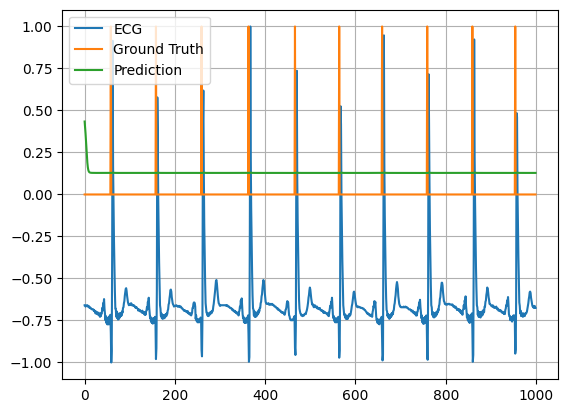

  9%|▉         | 275/3000 [00:00<00:07, 379.02it/s]

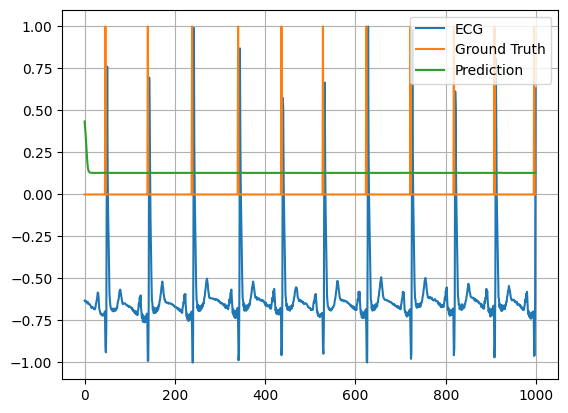

 19%|█▊        | 562/3000 [00:01<00:06, 391.14it/s]

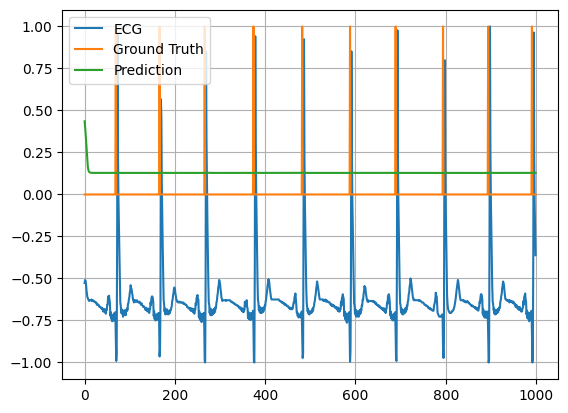

 30%|██▉       | 889/3000 [00:02<00:05, 384.35it/s]

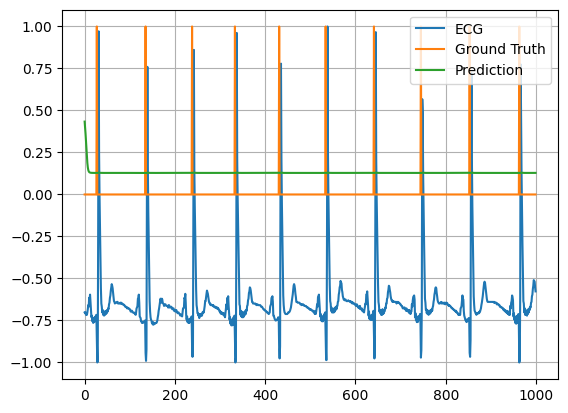

 39%|███▉      | 1179/3000 [00:03<00:04, 387.29it/s]

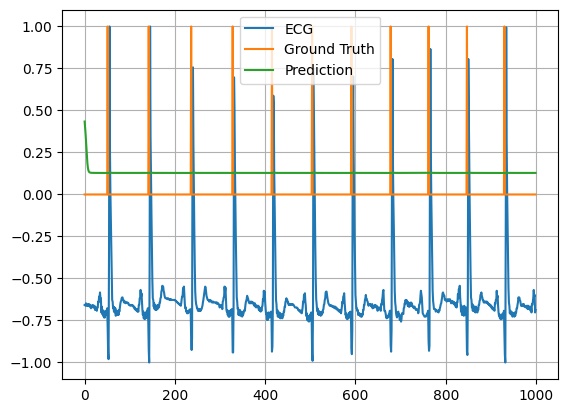

 49%|████▉     | 1470/3000 [00:04<00:03, 394.69it/s]

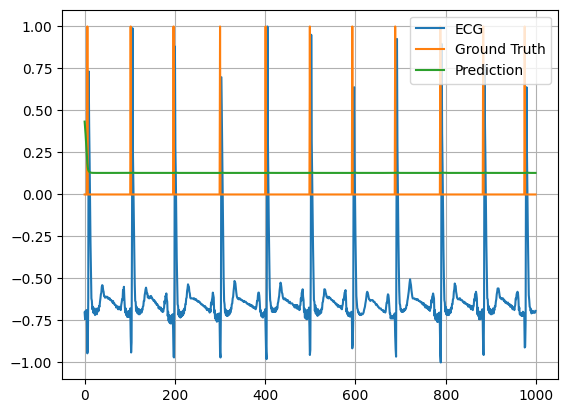

 59%|█████▉    | 1765/3000 [00:05<00:03, 396.20it/s]

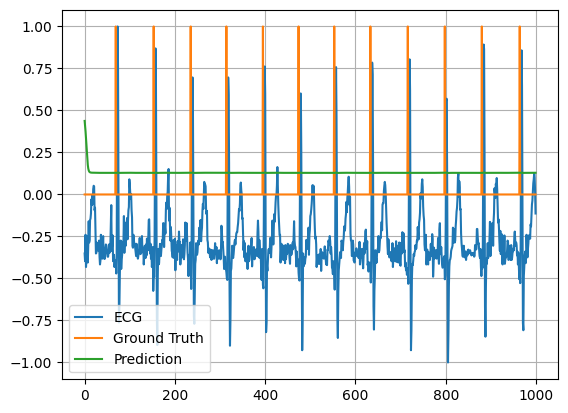

 70%|███████   | 2100/3000 [00:06<00:02, 404.26it/s]

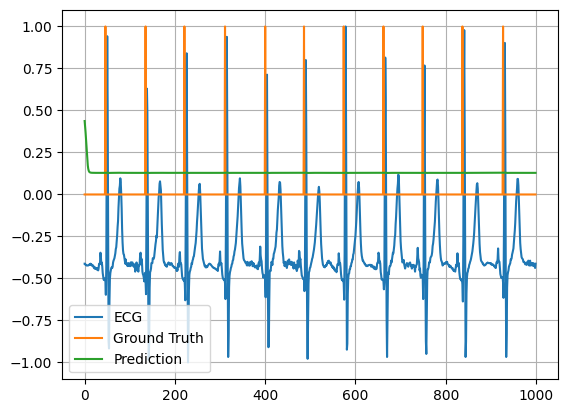

 80%|███████▉  | 2386/3000 [00:07<00:01, 374.91it/s]

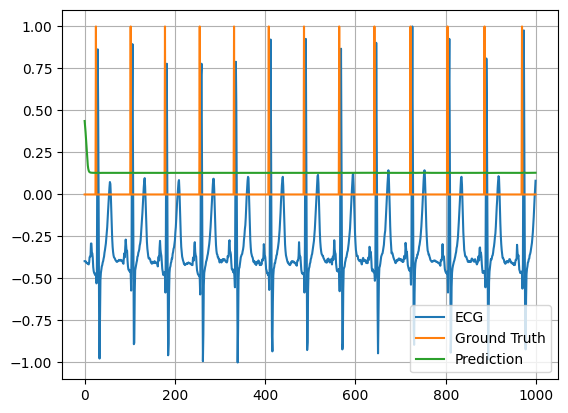

 89%|████████▉ | 2677/3000 [00:07<00:00, 383.77it/s]

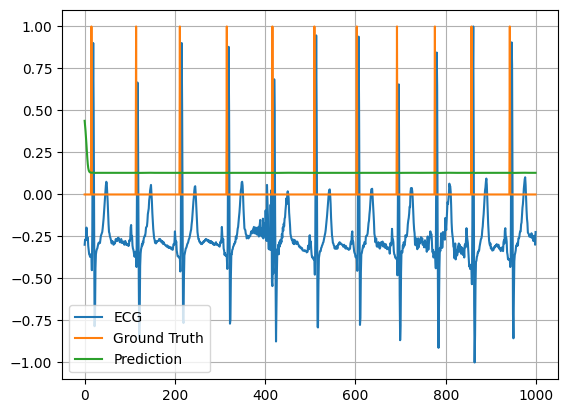

100%|██████████| 3000/3000 [00:08<00:00, 337.65it/s]



Test Loss: 0.1603
Test Accuracy: 0.98914
Test F1 Score: 0.00000
Test TPR: 0.00000
Test FPR: 0.00000



In [48]:
model.test_model(x_test=x_test, y_test=y_test, plot=True)

### Testing with own ECG recording

In [ ]:
my_test = np.load("E:\\ml-data\\masters-thesis\\myDataset\\Patryk\\07-05-24_16_56.npy")

In [ ]:
ECGs = split_signal(signal=my_test, fs=250, overlap_factor=0.25, window_in_seconds=10)

In [ ]:
my_X = []
my_Y = []

for ECG in ECGs:
  ECG = norm_min_max(signal=ECG, lower=-1, upper=1)
  ECG = nk.ecg_clean(ecg_signal=ECG, sampling_rate=250)
  my_X.append(ECG)
  
  _, r_peaks = nk.ecg_peaks(ecg_cleaned=ECG, sampling_rate=250)
  r_peaks = r_peaks["ECG_R_Peaks"]
  y = np.zeros_like(ECG)
  y[r_peaks] = 1

  my_Y.append(y)

my_Y = np.array(my_Y)
my_X = np.array(my_X)
my_X = np.expand_dims(my_X, 2)
my_Y = np.expand_dims(my_Y, 2)

In [ ]:
model.test_model(x_test=my_X, y_test=my_Y)

### Downsampling own ECG from 250 Hz to 100 Hz

In [ ]:
from scipy.signal import resample

In [ ]:
ecg_data = my_X[0]
downsampled_ecg_data = resample(ecg_data, 1000)

In [ ]:
plt.figure(figsize=(5,15))
plt.subplot(4,1,1)
plt.plot(ecg_data, 'b-')
plt.title("Original")
plt.grid()
plt.subplot(4,1,2)
plt.plot(downsampled_ecg_data, 'g-')
plt.title("Downsamples")
plt.grid()
plt.show()

In [ ]:
my_X = []
my_Y = []

for ECG in ECGs:
  ECG = norm_min_max(signal=ECG, lower=-1, upper=1)
  ECG = nk.ecg_clean(ecg_signal=ECG, sampling_rate=250)
  ECG = resample(ECG, 1000)
  my_X.append(ECG)
  
  _, r_peaks = nk.ecg_peaks(ecg_cleaned=ECG, sampling_rate=100)
  r_peaks = r_peaks["ECG_R_Peaks"]
  y = np.zeros_like(ECG)
  y[r_peaks] = 1

  my_Y.append(y)

my_Y = np.array(my_Y)
my_X = np.array(my_X)
my_X = np.expand_dims(my_X, 2)
my_Y = np.expand_dims(my_Y, 2)

In [ ]:
model.test_model(x_test=my_X, y_test=my_Y)

### Result of downsampling from 250 Hz to 100 Hz
As the result of downsampling from 250 Hz to 100 Hz, the test loss function of the model is lower than the test loss function before the downsampling.

### Load additional dataset - PTB-XL

In [75]:
data = load_ptbxl(path="E:\\ml-data\\masters-thesis\\ptb-xl-v2\\WFDB", sampling_rate=100)
data = np.array(data)
data = np.expand_dims(data, 2)
data = torch.Tensor(data)
data = data.to(device)

100%|██████████| 5/5 [00:00<00:00, 333.38it/s]


In [76]:
results = model(data)

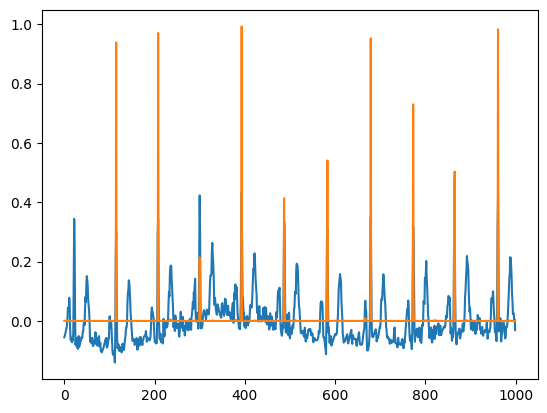

In [77]:
plt.plot(data[0].cpu())
plt.plot(results[0].cpu().detach().numpy())